In [51]:
# Imports
import numpy as np
import seaborn as sns

# Metro Map Implementation

## Pseudocode

### 1. Read calculated SOM

Done, see parse existing SOM

output: dict

### 2.a Component Planes (M)

For each unit, take the weight vector of the corresponding attribute

output: 2d matrix
output: replace weight_vectors (reshape)
```
for each component:
[
    []
    []
    []
]
```

### 2.b Discretization (M)

Input parameter `n`: number of bins

Generate discretized SOM

output
for each component:
represent to which bin the unit belongs

### 3. Component Lines (Fi)

For each bin, calculate the center of gravity
Save min and max of centers (low, high)

### 4. Visualization (Fi)

Connect the centers with lines

### 5. Aggregation (FL)

distance-based

Take pair wise lines,
    calculate distance between two lines:
        same_idx_dist <- sum of distances between pairs of centers of same indices
        inv_idx_dist <- sum of distances between paris of centers of inverted indices
        dist <- min(same_idx_dist, inv_idx_dist)

use Ward's clustering (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html)

### 6. Selection

See Algorithm 1 (NEU07_wsom paper)
select only components with a small amount of regions per bin

### 7. Snapping

See Algorithm 1 (https://github.com/yozoon/SOM-MetroMap/blob/main/implementation_report.pdf)

See implementation of template method `_find_snapped_line`

## References



## Metro Map Implementation

### 1. Read calculated SOM

In [57]:


# Parse existing SOM
from SOMToolBoxParser import SOMToolBoxParser
input_vectors = SOMToolBoxParser("datasets/iris/iris.vec").read_weight_file()
weight_vectors = SOMToolBoxParser("datasets/iris/iris.wgt.gz").read_weight_file()

{'xdim': 10,
 'ydim': 10,
 'vec_dim': 4,
 'arr': array([[5.6640333 , 3.93712216, 1.62621815, 0.32749945],
        [5.8479794 , 3.73208421, 2.26469555, 0.56992135],
        [6.44057366, 3.17245368, 3.97495271, 1.19303802],
        [6.64439671, 2.99508395, 4.51842446, 1.36253147],
        [6.77028475, 3.03404624, 4.69151149, 1.4436797 ],
        [6.83016839, 3.05587647, 4.90215459, 1.56479174],
        [6.94925326, 3.03909948, 5.39695695, 1.79007462],
        [7.15793705, 3.03924455, 5.89119444, 1.79036038],
        [7.43282543, 2.98697214, 6.21628668, 1.98880259],
        [7.67601165, 3.14815757, 6.59842088, 2.12734311],
        [5.61173184, 4.10825298, 1.42350701, 0.28493213],
        [5.59119796, 3.90984185, 1.7567834 , 0.39321438],
        [6.15278572, 3.32974716, 3.42439115, 1.00441124],
        [6.5179336 , 2.99610739, 4.39408611, 1.36731618],
        [6.5768977 , 2.98340238, 4.63280076, 1.49344237],
        [6.69337911, 3.03377758, 4.95408407, 1.71906862],
        [6.8186721 , 3.0

### 2.a Component Planes (M)

For each unit, take the weight vector of the corresponding attribute

output: 2d matrix
output: replace weight_vectors (reshape)
```
for each component:
[
    []
    []
    []
]
```



In [80]:
## TODO: figure out shape of the input weight matrix: attr,x,y or attr,y,x

component_planes = np.array([weight_vectors['arr'][:,i] for i in range(weight_vectors['vec_dim'])]).reshape(weight_vectors['vec_dim'],weight_vectors['xdim'],weight_vectors['ydim'])

component_planes

array([[[5.6640333 , 5.8479794 , 6.44057366, 6.64439671, 6.77028475,
         6.83016839, 6.94925326, 7.15793705, 7.43282543, 7.67601165],
        [5.61173184, 5.59119796, 6.15278572, 6.5179336 , 6.5768977 ,
         6.69337911, 6.8186721 , 6.86303438, 7.07868722, 7.23859085],
        [5.33559643, 5.35850576, 5.66956436, 6.25834615, 6.33762255,
         6.40178735, 6.57068637, 6.64525322, 6.64796053, 6.73045274],
        [5.20705456, 5.2224257 , 5.4084448 , 5.95179561, 6.07285648,
         6.06895332, 6.28358889, 6.40190934, 6.42463702, 6.4122743 ],
        [5.25571378, 5.27738005, 5.35775309, 5.81947062, 5.97876061,
         6.03473374, 6.13300578, 6.21496016, 6.32054041, 6.32408513],
        [5.10531878, 5.07512795, 5.24651464, 5.66976468, 5.73584791,
         5.91637915, 6.09391484, 6.17108509, 6.23075994, 6.11780014],
        [4.9508878 , 4.9556264 , 5.08181771, 5.5503461 , 5.77778692,
         5.88909481, 5.95321232, 5.94487209, 5.94867891, 5.84060905],
        [4.69703203, 4.8621

### 2.b Discretization (M)

Input parameter `n`: number of bins

Generate discretized SOM

output
for each component:
represent to which bin the unit belongs



<AxesSubplot:>

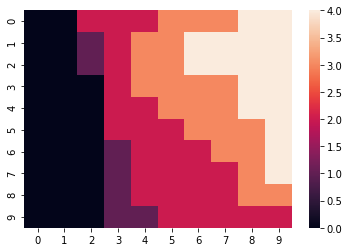

In [85]:
n = 5

discretized_planes = []

for component_plane in component_planes:

    step_size = (component_plane.max() - component_plane.min())/n

    discretized_planes.append(((component_plane - component_plane.min())/(step_size+0.0000001)).astype('int'))
    


sns.heatmap(discretized_planes[3])

### 3. Component Lines (Fi)

For each bin, calculate the center of gravity
Save min and max of centers (low, high)


## Metro Map Visualization


### 4. Visualization (Fi)

Connect the centers with lines



### 5. Aggregation (FL)

distance-based

Take pair wise lines,
    calculate distance between two lines:
        same_idx_dist <- sum of distances between pairs of centers of same indices
        inv_idx_dist <- sum of distances between paris of centers of inverted indices
        dist <- min(same_idx_dist, inv_idx_dist)

use Ward's clustering (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html)



### 6. Selection

See Algorithm 1 (NEU07_wsom paper)
select only components with a small amount of regions per bin



### 7. Snapping

See Algorithm 1 (https://github.com/yozoon/SOM-MetroMap/blob/main/implementation_report.pdf)

See implementation of template method `_find_snapped_line`



## References